# Predicting London House Prices

https://www.kaggle.com/datasets/oktayrdeki/houses-in-london/data

# Data

## Preprocessing

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [313]:
df = pd.read_csv('london_houses.csv')

In [314]:
df.head()

Address  Neighborhood  Bedrooms  Bathrooms  Square Meters  \
0      78 Regent Street  Notting Hill         2          3            179   
1     198 Oxford Street   Westminster         2          1            123   
2      18 Regent Street          Soho         5          3            168   
3  39 Piccadilly Circus     Islington         5          1            237   
4      116 Fleet Street    Marylebone         4          1            127   

   Building Age Garden Garage  Floors  Property Type        Heating Type  \
0            72     No     No       3  Semi-Detached    Electric Heating   
1            34    Yes     No       1      Apartment     Central Heating   
2            38     No    Yes       3  Semi-Detached     Central Heating   
3            53    Yes    Yes       1      Apartment  Underfloor Heating   
4            23     No    Yes       2  Semi-Detached     Central Heating   

              Balcony Interior Style    View          Materials  \
0  High-level Balcony     Industrial  Garden             Marble   
1  High-level Balcony     Industrial    City  Laminate Flooring   
2          No Balcony     Industrial  Street               Wood   
3          No Balcony        Classic    Park            Granite   
4          No Balcony         Modern    Park               Wood   

  Building Status  Price (£)  
0       Renovated    2291200  
1             Old    1476000  
2       Renovated    1881600  
3       Renovated    1896000  
4             Old    1524000

<Axes: xlabel='Square Meters', ylabel='Price (£)'>

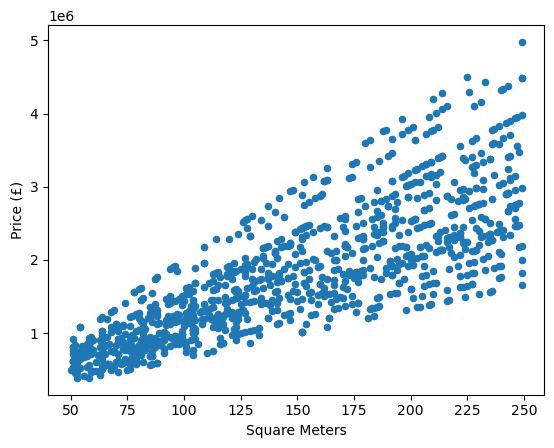

In [315]:
# square meters vs. price
sq_price = df[["Square Meters", "Price (£)"]]

sq_price.head()
sq_price.plot(x="Square Meters", y="Price (£)", kind="scatter")

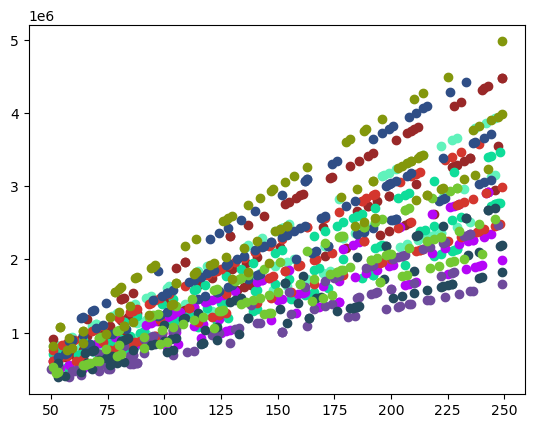

In [316]:
np.random.seed(42)
neighborhoods = df['Neighborhood'].unique()
colors = {neighborhood : np.random.rand(3,) for neighborhood in neighborhoods}

for neighborhood in neighborhoods:
    neighborhood_data = df[df['Neighborhood'] == neighborhood]
    plt.scatter(neighborhood_data['Square Meters'], neighborhood_data['Price (£)'], color=colors[neighborhood], label=neighborhood)

<Axes: xlabel='Bedrooms', ylabel='Price (£)'>

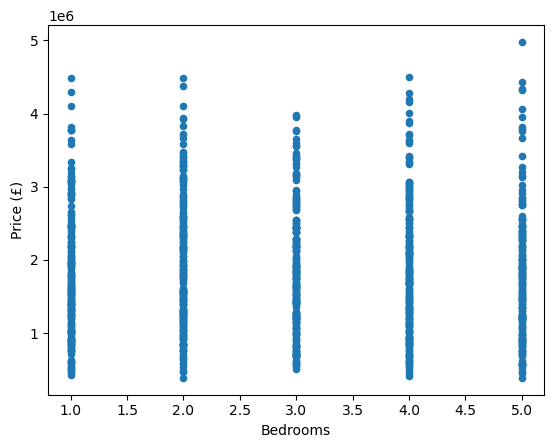

In [317]:
bedrooms = df[['Bedrooms', 'Price (£)']]

bedrooms.head()
bedrooms.plot(x="Bedrooms", y="Price (£)", kind="scatter")

In [318]:
# split data into features and label
feature_data = df.iloc[:, :-1] 
label_data = df.iloc[:, -1]
feature_data, label_data

(                   Address  Neighborhood  Bedrooms  Bathrooms  Square Meters  \
 0         78 Regent Street  Notting Hill         2          3            179   
 1        198 Oxford Street   Westminster         2          1            123   
 2         18 Regent Street          Soho         5          3            168   
 3     39 Piccadilly Circus     Islington         5          1            237   
 4         116 Fleet Street    Marylebone         4          1            127   
 ..                     ...           ...       ...        ...            ...   
 995  44 Camden High Street   Westminster         1          3             81   
 996          165 Park Lane        Camden         1          1             65   
 997  99 Camden High Street        Camden         4          1            191   
 998          155 Park Lane        Camden         5          2            131   
 999       145 Baker Street    Kensington         4          2            185   
 
      Building Age Garden 

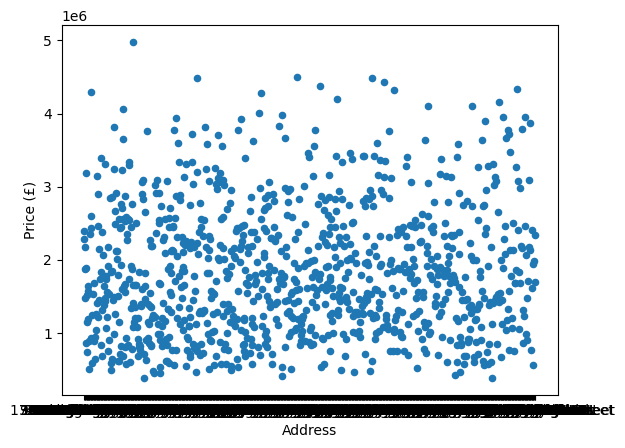

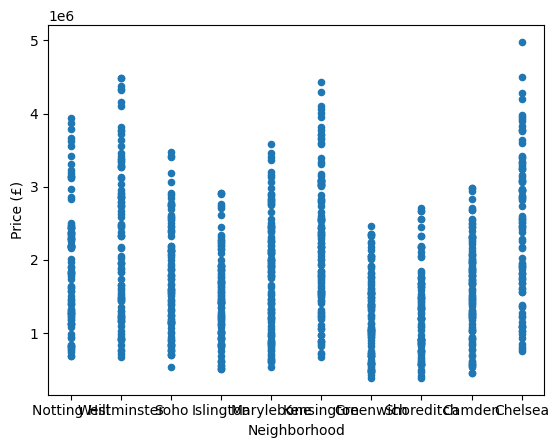

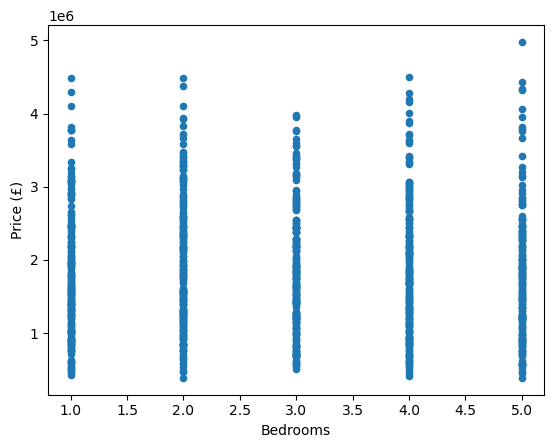

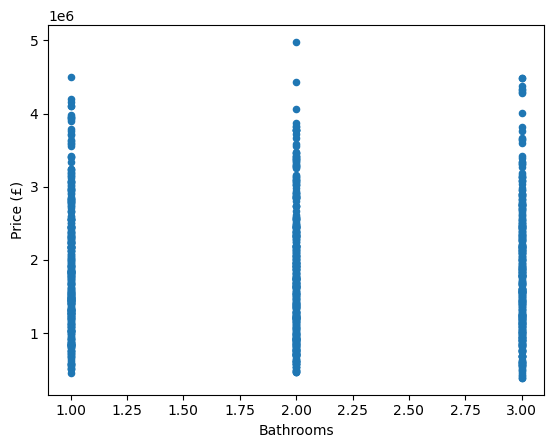

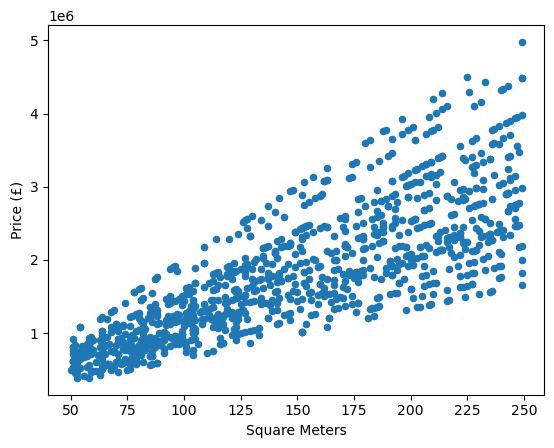

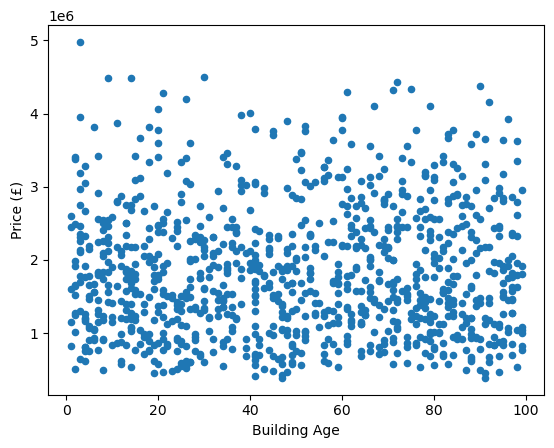

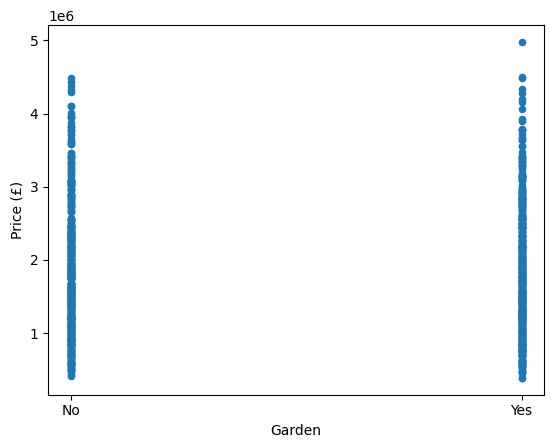

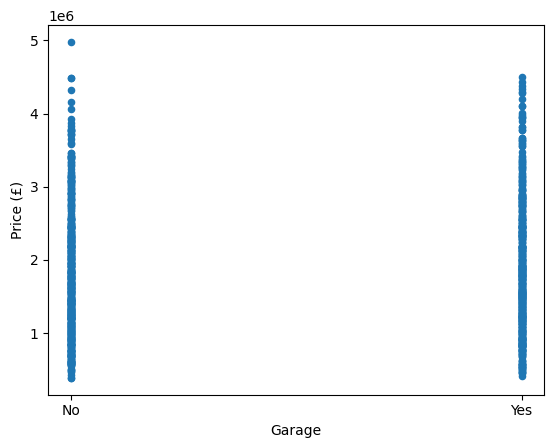

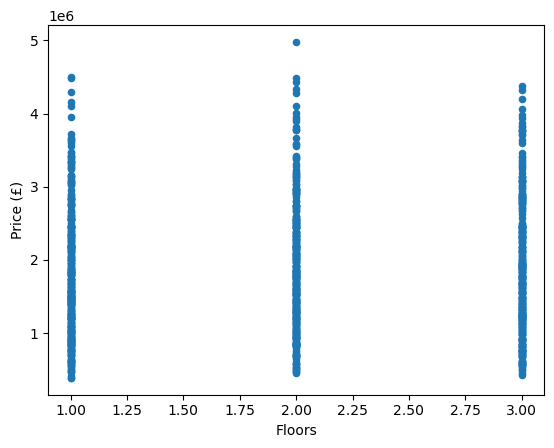

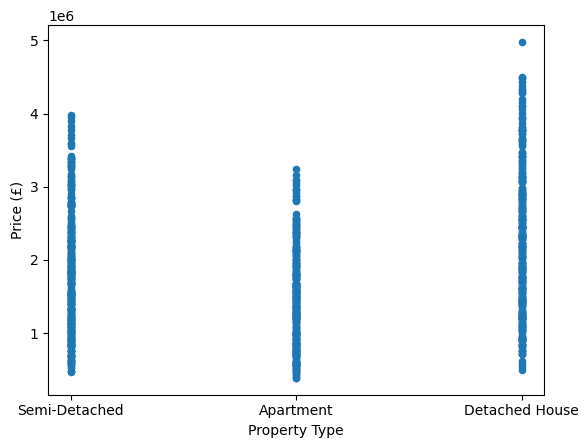

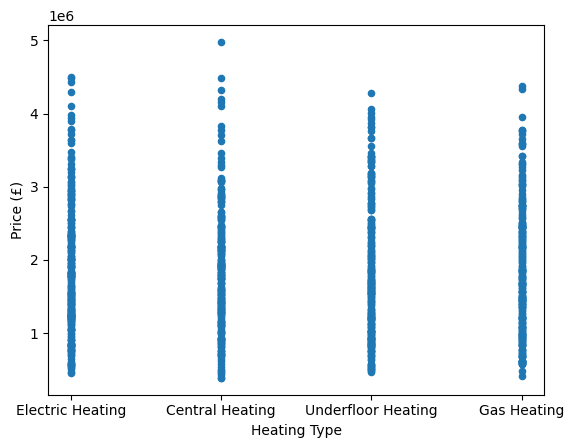

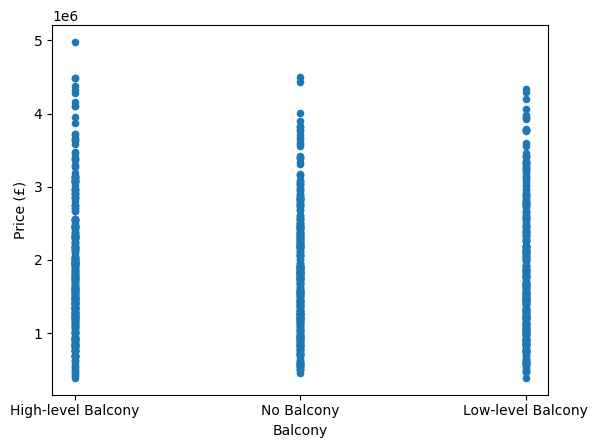

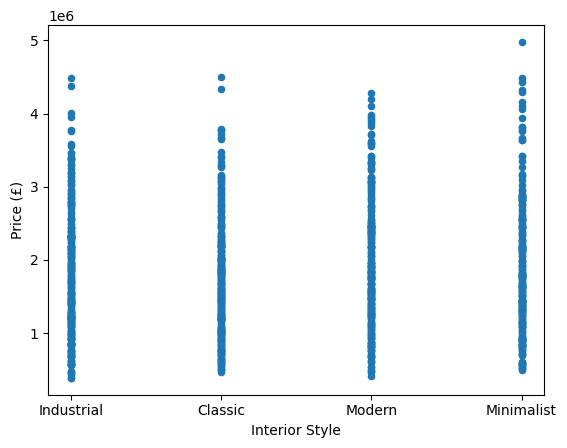

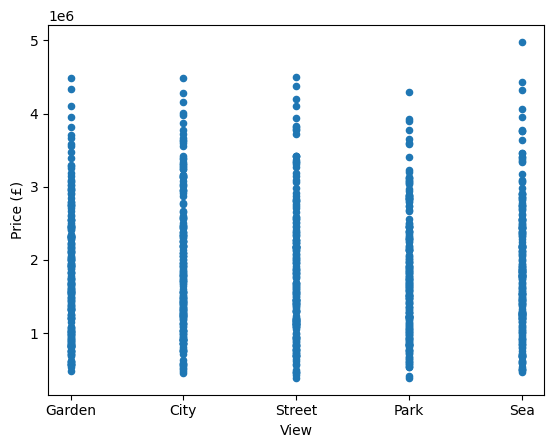

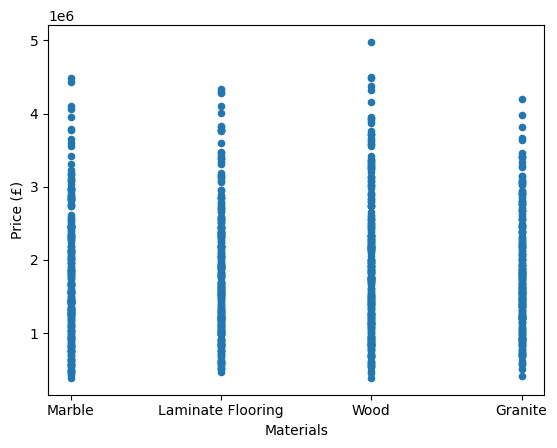

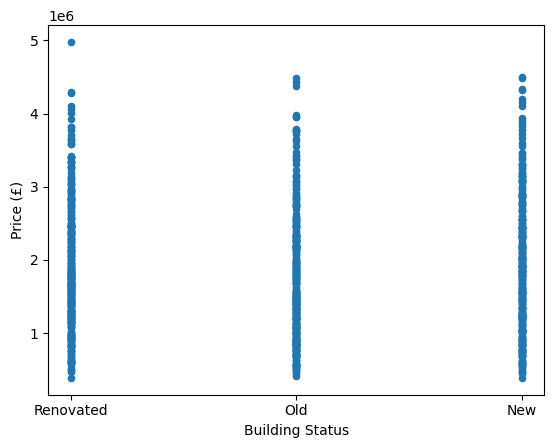

In [319]:
for x in feature_data:
    feature_versus_target = df[[x, 'Price (£)']]
    feature_versus_target.plot(x=x, y='Price (£)', kind='scatter')

In [320]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for x in feature_data.select_dtypes('object'):
    feature_data[x] = encoder.fit_transform(feature_data[x])

feature_data

Address  Neighborhood  Bedrooms  Bathrooms  Square Meters  Building Age  \
0        678             6         2          3            179            72   
1        422             9         2          1            123            34   
2        344             8         5          3            168            38   
3        517             3         5          1            237            53   
4         77             5         4          1            127            23   
..       ...           ...       ...        ...            ...           ...   
995      536             9         1          3             81             4   
996      277             0         1          1             65            51   
997      766             0         4          1            191            27   
998      235             0         5          2            131             3   
999      193             4         4          2            185            53   

     Garden  Garage  Floors  Property Type  Heating Type  Balcony  \
0         0       0       3              2             1        0   
1         1       0       1              0             0        0   
2         0       1       3              2             0        2   
3         1       1       1              0             3        2   
4         0       1       2              2             0        2   
..      ...     ...     ...            ...           ...      ...   
995       1       1       2              2             0        1   
996       0       0       1              0             3        2   
997       0       1       2              2             0        1   
998       1       0       2              1             3        0   
999       0       0       1              0             1        2   

     Interior Style  View  Materials  Building Status  
0                 1     1          2                2  
1                 1     0          1                1  
2                 1     4          3                2  
3                 0     2          0                2  
4                 3     2          3                1  
..              ...   ...        ...              ...  
995               3     4          1                2  
996               1     1          3                1  
997               2     2          1                1  
998               3     2          1                2  
999               3     4          3                1  

[1000 rows x 16 columns]

In [321]:
X = feature_data.to_numpy()
y = label_data.to_numpy()

X.shape, y.shape

((1000, 16), (1000,))

In [322]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 16), (800,), (200, 16), (200,))

In [323]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Normalize features
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Normalize target (reshape needed for 1D array)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Models

In [324]:
from sklearn.metrics import mean_squared_error
import math

In [325]:
r2_scores = dict()

## Linear Regression

In [326]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression().fit(X_train, y_train)

In [327]:
train_score = model_1.score(X_train, y_train)
test_score = model_1.score(X_test, y_test)

train_score, test_score

(0.6554961415014834, 0.6516765177232067)

In [328]:
r2_scores['Linear Regression'] = test_score

In [329]:
# train RMSE
y_train_predict = model_1.predict(X_train)
rmse_train = math.sqrt(mean_squared_error(y_train, y_train_predict))

# test RMSE
y_test_predict = model_1.predict(X_test)
rmse_test = math.sqrt(mean_squared_error(y_test, y_test_predict))

rmse_train, rmse_test

(0.5869445105787401, 0.6059422664782247)

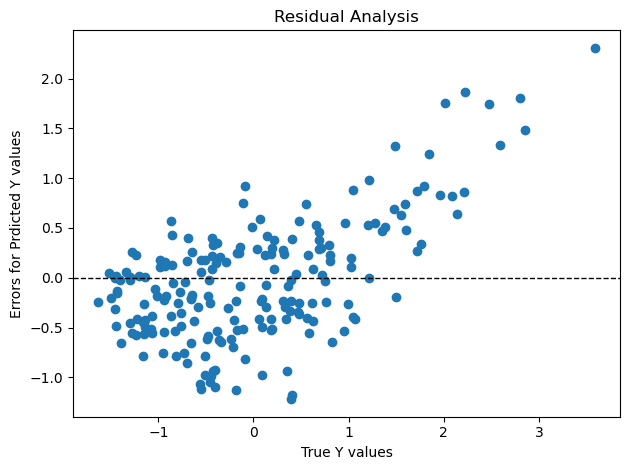

In [330]:
errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

## Lasso Regression (L2)

In [331]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 16), (800, 1), (200, 16), (200, 1))

In [332]:
from sklearn.linear_model import LassoCV

# Create a LassoCV object
model_2 = LassoCV(cv=5)  # 5-fold cross-validation

# Fit the model to the training data
model_2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5)

In [333]:
train_score = model_2.score(X_train, y_train)
test_score = model_2.score(X_test, y_test)

train_score, test_score

(0.6461863977160298, 0.6552063970104671)

In [334]:
r2_scores['Lasso Regression'] = test_score

In [335]:
# train RMSE
y_train_predict = model_2.predict(X_train)
rmse_train = math.sqrt(mean_squared_error(y_train, y_train_predict))

# test RMSE
y_test_predict = model_2.predict(X_test)
rmse_test = math.sqrt(mean_squared_error(y_test, y_test_predict))

rmse_train, rmse_test

(0.5948223283334025, 0.602864165717585)

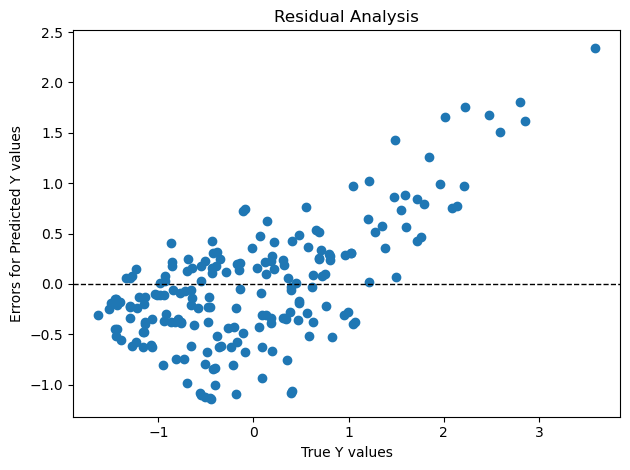

In [336]:
errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Predicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

## Decision Tree

In [337]:
from sklearn.tree import DecisionTreeRegressor

model_3 = DecisionTreeRegressor(random_state=42)

model_3.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [338]:
train_score = model_3.score(X_train, y_train)
test_score = model_3.score(X_test, y_test)

train_score, test_score

(1.0, 0.8183239623021059)

In [339]:
r2_scores['Decision Tree V1'] = test_score

Model is overfitting

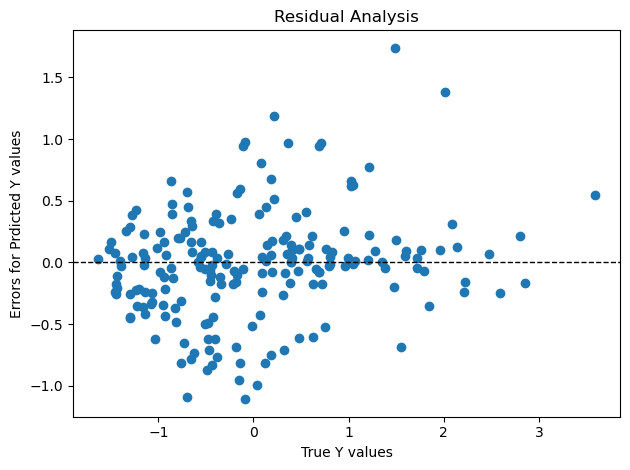

In [340]:
y_test_predict = model_3.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

In [341]:
depth_scores = dict()
for n in range(3, 12):
    model_3_2 = DecisionTreeRegressor(random_state=42, max_depth=n)
    model_3_2.fit(X_train, y_train)

    train_score = model_3_2.score(X_train, y_train)
    test_score = model_3_2.score(X_test, y_test)

    depth_scores[n] = (train_score, test_score)

depth_scores

{3: (0.6882736736561388, 0.6867249412786245),
 4: (0.7406480390899128, 0.7074939299648164),
 5: (0.8062074336713222, 0.7385652681923875),
 6: (0.8769447872892963, 0.7840249410523954),
 7: (0.9313180038508135, 0.8164019646628461),
 8: (0.9661911600481354, 0.8100584883960849),
 9: (0.9875769615845643, 0.7869808582071988),
 10: (0.9975412081491772, 0.8047100795309128),
 11: (0.9995910230137324, 0.7974931089598026)}

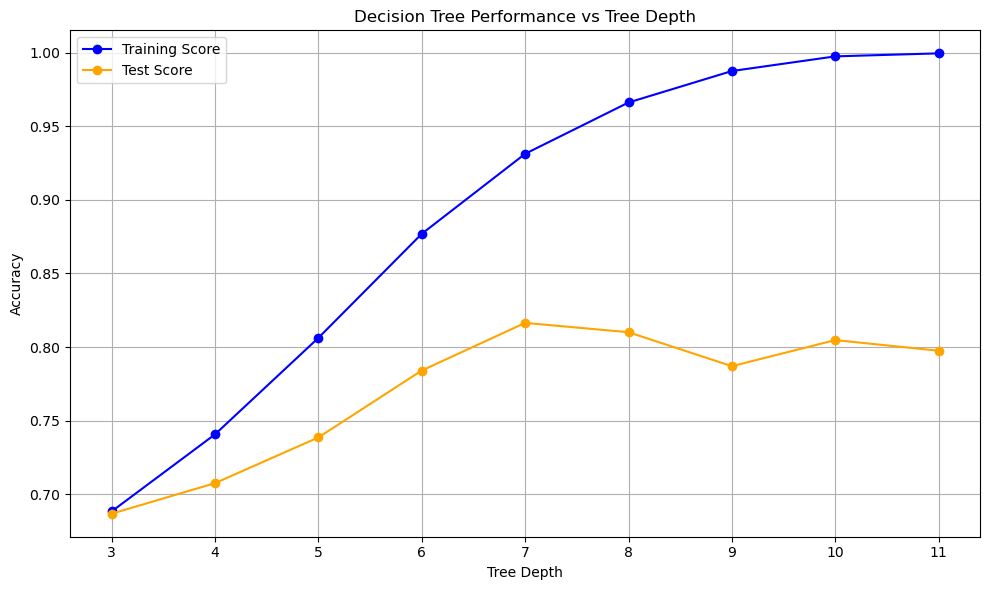

In [342]:
depths = list(depth_scores.keys())
train_scores = [scores[0] for scores in depth_scores.values()]
test_scores = [scores[1] for scores in depth_scores.values()]

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Score', color='blue')
plt.plot(depths, test_scores, 'o-', label='Test Score', color='orange')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs Tree Depth')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

7 is the ideal depth

In [343]:
model_3_3 = DecisionTreeRegressor(random_state=42, max_depth=7)
model_3_2.fit(X_train, y_train)

train_score = model_3_2.score(X_train, y_train)
test_score = model_3_2.score(X_test, y_test)

train_score, test_score

(0.9995910230137324, 0.7974931089598026)

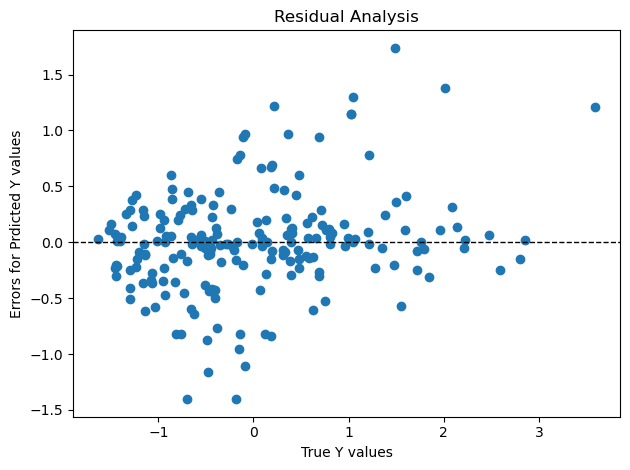

In [344]:
y_test_predict = model_3_2.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

In [345]:
r2_scores['Decision Tree V2'] = test_score

## Random Forest

In [346]:
from sklearn.ensemble import RandomForestRegressor

model_4 = RandomForestRegressor(n_estimators=5, random_state=42, oob_score=True)
model_4.fit(X_train, y_train)

/var/folders/8p/pslxyyhj0qj4f30f0613clj40000gq/T/ipykernel_1742/2287728600.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4.fit(X_train, y_train)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=42)

In [347]:
test_score = model_4.score(X_test, y_test)
test_score

0.8362738970188444

In [348]:
r2_scores['Random Forest V1'] = test_score

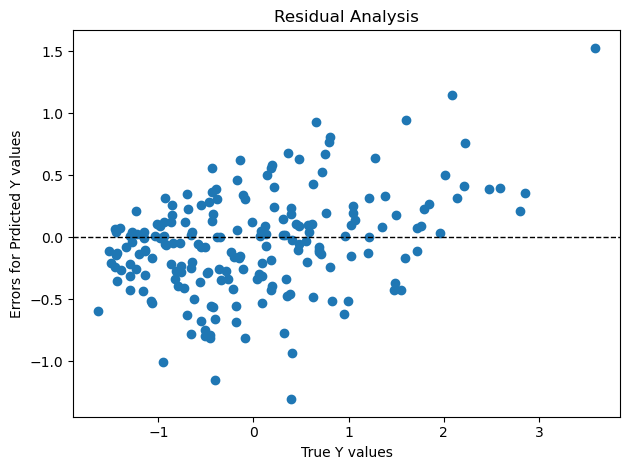

In [349]:
y_test_predict = model_4.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

In [350]:
estimator_scores = dict()

for n in range(3, 15):
    model_4_2 =  RandomForestRegressor(n_estimators=n, random_state=42)
    model_4_2.fit(X_train, y_train)

    train_score = model_4_2.score(X_train, y_train)
    test_score = model_4_2.score(X_test, y_test)

    estimator_scores[n] = (train_score, test_score)

estimator_scores

/var/folders/8p/pslxyyhj0qj4f30f0613clj40000gq/T/ipykernel_1742/3858017581.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4_2.fit(X_train, y_train)
/var/folders/8p/pslxyyhj0qj4f30f0613clj40000gq/T/ipykernel_1742/3858017581.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4_2.fit(X_train, y_train)
/var/folders/8p/pslxyyhj0qj4f30f0613clj40000gq/T/ipykernel_1742/3858017581.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4_2.fit(X_train, y_train)
/var/folders/8p/pslxyyhj0qj4f30f0613clj40000gq/T/ipykernel_1742/3858017581.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

{3: (0.9532204204081224, 0.7816291641095635),
 4: (0.9611994667647159, 0.8199808594249736),
 5: (0.9659691828685812, 0.8362738970188444),
 6: (0.9710555345134332, 0.8557151922963151),
 7: (0.9746475397898513, 0.8682786714833514),
 8: (0.9769224853251699, 0.8738811043880805),
 9: (0.9778975361518473, 0.8783992995751113),
 10: (0.9780865701661676, 0.8797254348523565),
 11: (0.9786356301961305, 0.87855137079633),
 12: (0.9797225490024764, 0.8803413775879367),
 13: (0.9802173355502845, 0.8838346982462725),
 14: (0.9807831574001069, 0.8830317817007556)}

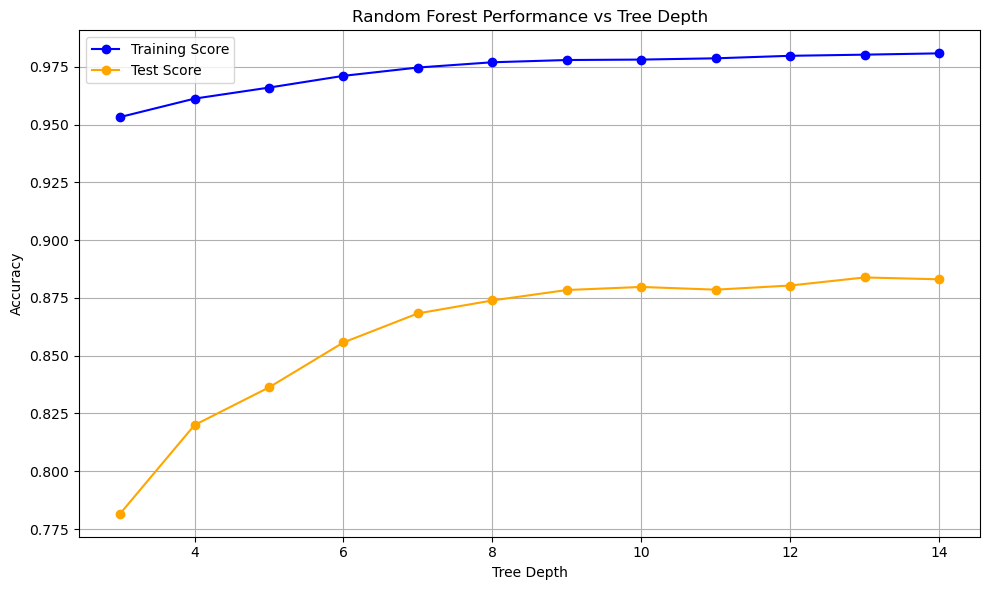

In [351]:
estimators = list(estimator_scores.keys())
train_scores = [scores[0] for scores in estimator_scores.values()]
test_scores = [scores[1] for scores in estimator_scores.values()]

plt.figure(figsize=(10, 6))
plt.plot(estimators, train_scores, 'o-', label='Training Score', color='blue')
plt.plot(estimators, test_scores, 'o-', label='Test Score', color='orange')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs Tree Depth')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [352]:
model_4_3 =  RandomForestRegressor(n_estimators=n, random_state=42)
model_4_3.fit(X_train, y_train)

/var/folders/8p/pslxyyhj0qj4f30f0613clj40000gq/T/ipykernel_1742/490283137.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4_3.fit(X_train, y_train)


RandomForestRegressor(n_estimators=14, random_state=42)

In [353]:
test_score = model_4_3.score(X_test, y_test)
test_score

0.8830317817007556

In [354]:
r2_scores['Random Forest V2'] = test_score

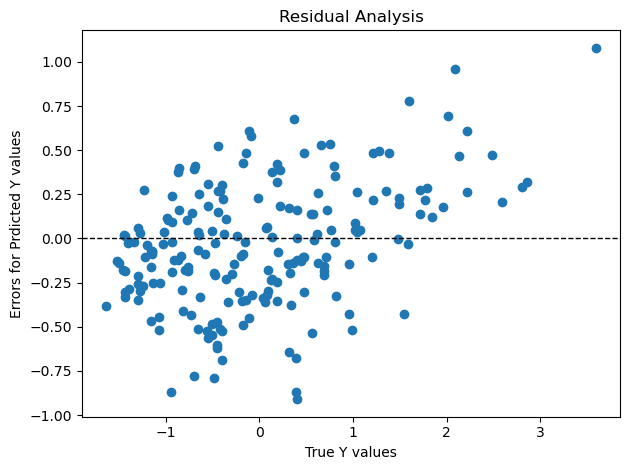

In [355]:
y_test_predict = model_4_3.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

## AdaBoost

In [356]:
from sklearn.ensemble import AdaBoostRegressor

In [357]:
model_5 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=5, random_state=42)
model_5.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=5,
                  random_state=42)

In [358]:
test_score = model_5.score(X_test, y_test)
test_score

0.7555259730291606

In [359]:
r2_scores['AdaBoost V1'] = test_score

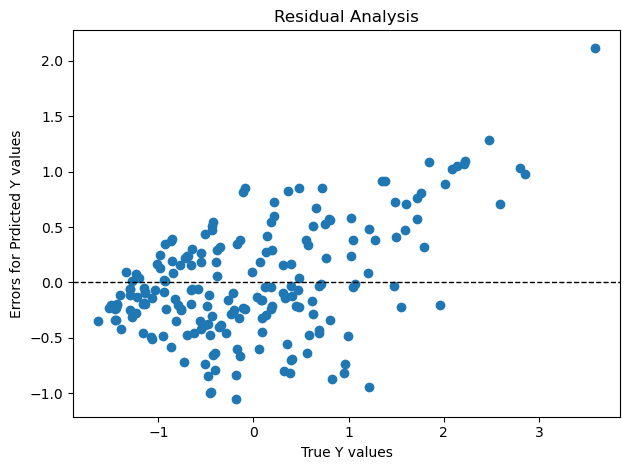

In [360]:
y_test_predict = model_5.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

In [361]:
from sklearn.model_selection import GridSearchCV

hyperparameters = [
    {
        'n_estimators': [i for i in range(3, 15)],
        'estimator' : [DecisionTreeRegressor(max_depth=i) for i in range(3, 12)]
    }
]

model_5_2 = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=hyperparameters, cv=5, refit=True, n_jobs=1)
model_5_2.fit(X_train, y_train)
print(f"Best Parameters: {model_5_2.best_params_} | Test Score: {model_5_2.score(X_test, y_test)} | Train Score: {model_5_2.score(X_train, y_train)}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Best Parameters: {'estimator': DecisionTreeRegressor(max_depth=8), 'n_estimators': 14} | Test Score: 0.8606086014270249 | Train Score: 0.9898795306795309


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [365]:
model_5_3 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=8), n_estimators=14, random_state=42)
model_5_3.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=8), n_estimators=14,
                  random_state=42)

In [366]:
test_score = model_5_3.score(X_test, y_test)
test_score

0.8580670247637856

In [367]:
r2_scores['AdaBoost V2'] = test_score

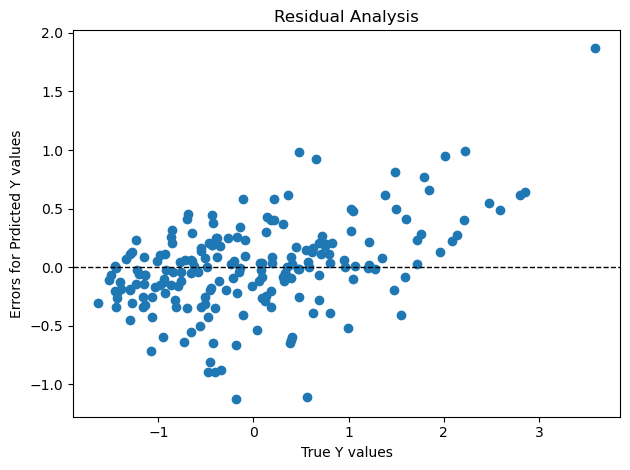

In [368]:
y_test_predict = model_5_3.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

## Gradient Boost

In [369]:
from sklearn.ensemble import GradientBoostingRegressor

model_6 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, loss='squared_error')
model_6.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5, random_state=42)

In [370]:
test_score = model_6.score(X_test, y_test)
test_score

0.9810672088343877

In [371]:
r2_scores['Gradient Boost V1'] = test_score

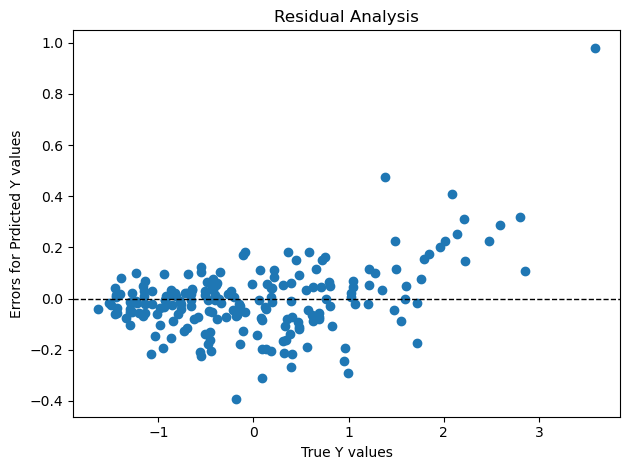

In [372]:
y_test_predict = model_6.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

In [286]:
from sklearn.model_selection import GridSearchCV

hyperparameters = [
    {
        'n_estimators': [i for i in range(40, 100)],
        'max_depth' : [i for i in range(3, 100)]
    }
]

model_6_2 = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=hyperparameters, cv=5, refit=True, n_jobs=1)
model_6_2.fit(X_train, y_train)
print(f"Best Parameters: {model_6_2.best_params_} | Test Score: {model_6_2.score(X_test, y_test)} | Train Score: {model_6_2.score(X_train, y_train)}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Best Parameters: {'max_depth': 4, 'n_estimators': 98} | Test Score: 0.978431473203673 | Train Score: 0.9952407682287405


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [373]:
model_6_3 = GradientBoostingRegressor(n_estimators=98, learning_rate=0.1, max_depth=4, random_state=42, loss='squared_error')
model_6_3.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=4, n_estimators=98, random_state=42)

In [374]:
test_score = model_6_3.score(X_test, y_test)
test_score

0.9778991763625334

In [375]:
r2_scores['Gradient Boost V2'] = test_score

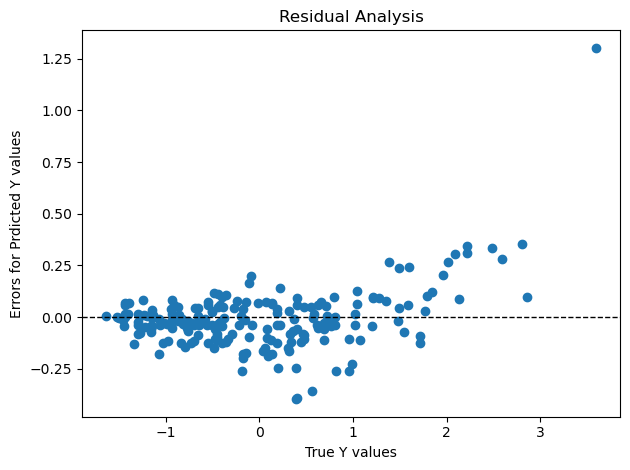

In [376]:
y_test_predict = model_6_3.predict(X_test)

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

## Neural Network

In [377]:
import torch
from torch import nn

In [378]:
def r2_score(y_true, y_pred):
    """
    Calculate R^2 (coefficient of determination) score in PyTorch.

    Parameters:
        y_true (torch.Tensor): Actual target values
        y_pred (torch.Tensor): Predicted values

    Returns:
        torch.Tensor: R^2 score
    """
    ss_total = torch.sum((y_true - torch.mean(y_true)) ** 2)  # Total sum of squares
    ss_residual = torch.sum((y_true - y_pred) ** 2)           # Residual sum of squares
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [379]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([800, 16]),
 torch.Size([200, 16]),
 torch.Size([800, 1]),
 torch.Size([200, 1]))

In [380]:
model_7 = nn.Sequential(
    nn.Linear(in_features=16, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=1)
)

In [381]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_7.parameters(), lr=0.1)

In [382]:
torch.manual_seed(42)
epochs = 600

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_7.train()
    
    y_pred = model_7(X_train_tensor)

    loss = loss_fn(y_pred, y_train_tensor)
    train_r2 = r2_score(y_true=y_train_tensor, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_7.eval()
    with torch.inference_mode():
        y_pred = model_7(X_test_tensor)
        test_loss = loss_fn(y_pred, y_test_tensor)
        test_r2 = r2_score(y_true=y_test_tensor, y_pred=y_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss.item()} | Train R2: {train_r2} | Test Loss: {test_loss.item()} | Test R2: {test_r2}")
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

Epoch: 0 | Train Loss: 1.0131436586380005 | Train R2: -0.013143658638000488 | Test Loss: 1.0502054691314697 | Test R2: 0.0036899447441101074
Epoch: 10 | Train Loss: 0.8866251111030579 | Train R2: 0.11337488889694214 | Test Loss: 0.9247899055480957 | Test R2: 0.12266933917999268
Epoch: 20 | Train Loss: 0.6348598599433899 | Train R2: 0.3651401400566101 | Test Loss: 0.6638245582580566 | Test R2: 0.37024223804473877
Epoch: 30 | Train Loss: 0.41026607155799866 | Train R2: 0.5897339582443237 | Test Loss: 0.4557783901691437 | Test R2: 0.5676116943359375
Epoch: 40 | Train Loss: 0.36776506900787354 | Train R2: 0.6322349309921265 | Test Loss: 0.4134700298309326 | Test R2: 0.6077487468719482
Epoch: 50 | Train Loss: 0.35000935196876526 | Train R2: 0.6499906778335571 | Test Loss: 0.3980695307254791 | Test R2: 0.6223589181900024
Epoch: 60 | Train Loss: 0.3373251259326935 | Train R2: 0.6626749038696289 | Test Loss: 0.39120566844940186 | Test R2: 0.6288706064224243
Epoch: 70 | Train Loss: 0.3269195854

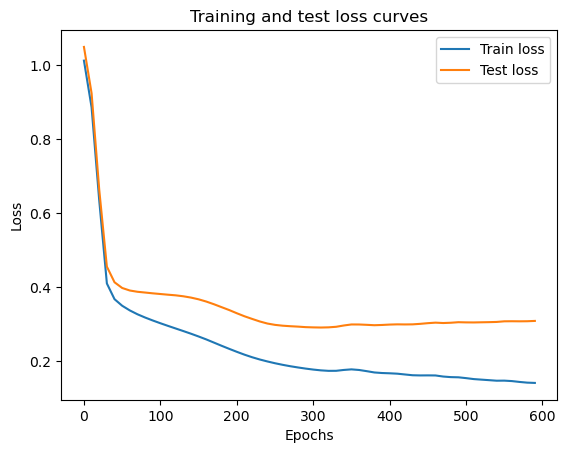

In [383]:
# Loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [384]:
model_7_2 = nn.Sequential(
    nn.Linear(in_features=16, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=1)
)

In [385]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_7_2.parameters(), lr=0.1)

In [386]:
torch.manual_seed(42)
epochs = 300

for epoch in range(epochs):
    model_7_2.train()
    
    y_pred = model_7_2(X_train_tensor)

    loss = loss_fn(y_pred, y_train_tensor)
    train_r2 = r2_score(y_true=y_train_tensor, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_7_2.eval()
    with torch.inference_mode():
        y_pred = model_7_2(X_test_tensor)
        test_loss = loss_fn(y_pred, y_test_tensor)
        test_r2 = r2_score(y_true=y_test_tensor, y_pred=y_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss.item()} | Train R2: {train_r2} | Test Loss: {test_loss.item()} | Test Accuracy: {test_r2}")

Epoch: 0 | Train Loss: 1.1128860712051392 | Train R2: -0.11288607120513916 | Test Loss: 1.1475012302398682 | Test Accuracy: -0.08861267566680908
Epoch: 10 | Train Loss: 0.5837435126304626 | Train R2: 0.41625648736953735 | Test Loss: 0.64878249168396 | Test Accuracy: 0.3845123052597046
Epoch: 20 | Train Loss: 0.3973485231399536 | Train R2: 0.6026514768600464 | Test Loss: 0.45538756251335144 | Test Accuracy: 0.5679824352264404
Epoch: 30 | Train Loss: 0.35854247212409973 | Train R2: 0.6414575576782227 | Test Loss: 0.41131705045700073 | Test Accuracy: 0.6097912788391113
Epoch: 40 | Train Loss: 0.34223267436027527 | Train R2: 0.6577672958374023 | Test Loss: 0.3954814076423645 | Test Accuracy: 0.6248142719268799
Epoch: 50 | Train Loss: 0.3306125998497009 | Train R2: 0.6693874001502991 | Test Loss: 0.3858281970024109 | Test Accuracy: 0.6339720487594604
Epoch: 60 | Train Loss: 0.3204694986343384 | Train R2: 0.6795305013656616 | Test Loss: 0.3786308765411377 | Test Accuracy: 0.6408000588417053


In [387]:
with torch.inference_mode():
    y_test_predict = model_7_2(X_test_tensor)
test_r2 = r2_score(y_true=y_test_tensor, y_pred=y_test_predict)
test_r2

tensor(0.7293)

In [388]:
r2_scores['Neural Network'] = test_r2

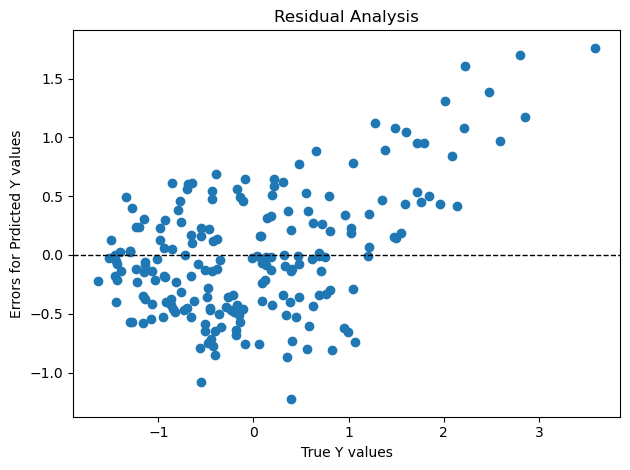

In [389]:
y_test_predict = y_test_predict.detach().numpy()

errors = y_test - y_test_predict.reshape(-1,1)

plt.scatter(y_test, errors)

# Add horizontal line at y=10
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.xlabel("True Y values")
plt.ylabel("Errors for Prdicted Y values")
plt.title("Residual Analysis")
plt.tight_layout()
plt.show()

# Results

In [390]:
r2_scores

{'Linear Regression': 0.6516765177232067,
 'Lasso Regression': 0.6552063970104671,
 'Decision Tree V1': 0.8183239623021059,
 'Decision Tree V2': 0.7974931089598026,
 'Random Forest V1': 0.8362738970188444,
 'Random Forest V2': 0.8830317817007556,
 'AdaBoost V1': 0.7555259730291606,
 'AdaBoost V2': 0.8580670247637856,
 'Gradient Boost V1': 0.9810672088343877,
 'Gradient Boost V2': 0.9778991763625334,
 'Neural Network': tensor(0.7293)}

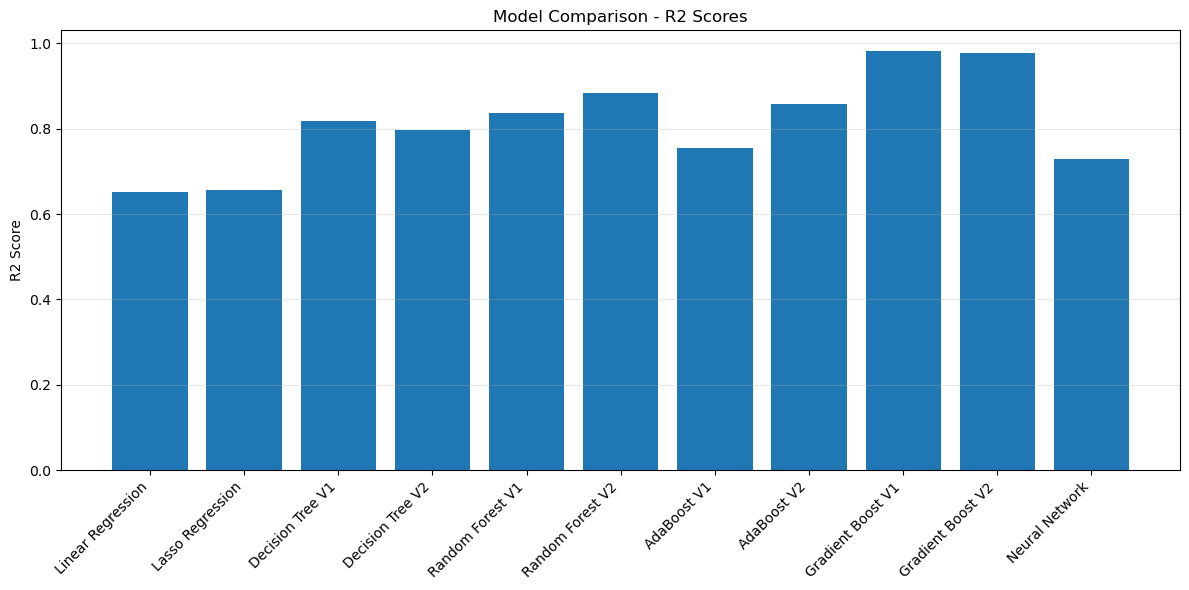

In [391]:
plt.figure(figsize=(12, 6))
models = list(r2_scores.keys())
scores = list(r2_scores.values())

plt.bar(models, scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Scores')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()